## Text Analysis Complains

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cis_complaints = pd.read_excel('ftc_data/00612_redacted_covid_19_complaints.xlsx', sheet_name='CIS Complaints', header=0)
idt_complaints = pd.read_excel('ftc_data/00612_redacted_covid_19_complaints.xlsx', sheet_name='IDT Complaints', header=0)
dnc_complaints = pd.read_excel('ftc_data/00612_redacted_covid_19_complaints.xlsx', sheet_name='DNC Complaints', header=0)

In [3]:
list_complaints = []
list_complaints.extend(list(cis_complaints['Complaint Info Comments']))
list_complaints.extend(list(idt_complaints['Theft Activity Comments']))
list_complaints.extend(list(dnc_complaints['Other Information Comments']))

In [4]:
text_complaints = ' '.join([str(i).lower() for i in list_complaints])

In [6]:
def clean_text_round(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('<.*?>', ' ', text)
    text = re.sub('\\n', ' ', text) 
    text = re.sub('\n', ' ', text) 
    text = re.sub('\t', ' ', text) 
    text = re.sub('\(b\)\(6\)', ' ', text) 
    text = re.sub('&quot', ' ', text) 
    text = re.sub('---', ' ', text)
    text = re.sub('wa', ' ', text) 
    return text

In [7]:
text_complaints = clean_text_round(text_complaints)

In [8]:
#text_complaints

In [9]:
# Wordcloud python library
from wordcloud import WordCloud

In [14]:
# Dfining wordcloud object
wc = WordCloud(background_color="white", 
               colormap="Dark2", 
               max_font_size=60, 
               random_state=42)

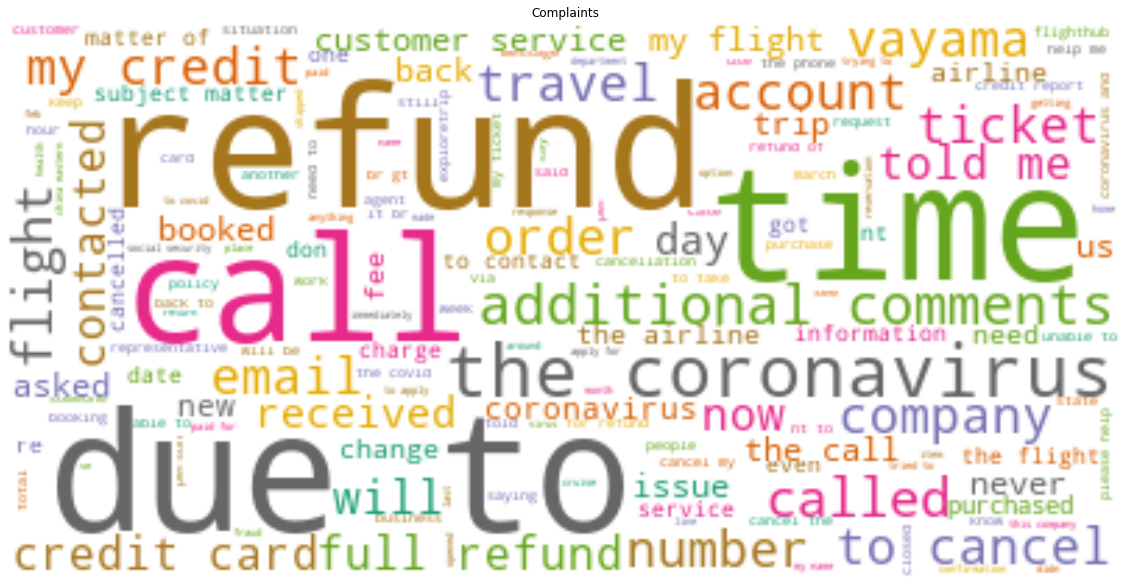

In [16]:
wc.generate(text_complaints)
plt.figure(figsize=(20,16))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Complaints')
plt.show()